# ElasticNet回归原理

**ElasticNet 回归**是一种结合了 Lasso 回归 和 岭回归 优势的线性模型。它在线性回归的损失函数中同时引入了 L1 正则化 和 L2 正则化，通过调节两个正则化系数实现对特征选择和系数平滑的权衡。

## ElasticNet回归数学表达式

ElasticNet回归的数学表达式与多元线性回归类似，ElasticNet回归模型的一般形式为：
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$$
其中：
- $y$是因变量（目标变量）。
- $x_1, x_2, \dots, x_p$是自变量（特征变量）。
- $\beta_0$是截距，表示当所有自变量均为零时$y$的取值。
- $\beta_1, \beta_2, \dots, \beta_p$是回归系数，表示每个自变量对因变量的线性影响。
- $\epsilon$是误差项，表示模型未解释的部分。

## ElasticNet回归目标函数

ElasticNet回归的目标是最小化残差平方和与模型系数的L1和L2范数之和的加权和，其数学公式如下：

$$\min_{\beta} \left( \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 \right) + \alpha \left( \rho \sum_{j=1}^{p} |\beta_j| + (1 - \rho) \sum_{j=1}^{p} \beta_j^2 \right)$$

其中：
- $n$是样本数量。
- $p$是特征数量。
- $y_i$是第$i$个样本的目标值。
- $x_{ij}$是第$i$个样本的第$j$个特征的值。
- $\beta_0$是截距项。
- $\beta_j$是第$j$个特征的系数。
- $\alpha$是正则化参数，控制模型复杂度和拟合度之间的权衡。
- $\rho$是平衡L1和L2正则化贡献的参数，取值范围为$[0, 1]$。

通过调整$\rho$，ElasticNet可以灵活地在Lasso和Ridge之间进行插值：
- 当$\rho = 1$时，ElasticNet退化为纯Lasso回归。
- 当$\rho = 0$时，ElasticNet退化为纯Ridge回归。

## ElasticNet回归的优缺点

### ElasticNet回归的优点

- **结合L1和L2正则化**：ElasticNet结合了Lasso的特征选择能力和Ridge的数值稳定性，特别适用于处理高度相关或多重共线性的特征
- **提高模型泛化能力**：通过同时控制模型的复杂度和特征选择，ElasticNet有助于提高模型的泛化能力，减少过拟合
- **处理高维数据**：ElasticNet在处理特征数量多于样本数量的数据集时表现出色，能够有效地进行特征选择和模型训练

### ElasticNet回归的缺点

- **参数选择复杂**：ElasticNet引入了两个超参数$\lambda$和$\alpha$，需要通过交叉验证等方法进行调优，增加了模型训练的复杂性
- **解释性有限**：虽然ElasticNet可以进行特征选择，但L1正则化可能会导致某些系数为零，这在某些需要高解释性的场景下可能不太理想

# ElasticNet回归案例

## ElasticNet
  - **alpha**：控制正则化项的强度，即损失函数中正则化部分的权重。
  - **l1_ratio**：控制 Lasso (L1 正则化) 和 Ridge (L2 正则化) 的比例权重，取值范围为0到1。
  - **random_state**：随机数种子

## 实例展示与代码实现

**make_regression**: 用于生成模拟回归数据集
  - **n_samples**: 生成的样本数量
  - **n_features**: 生成的特征数量
  - **noise**: 添加到目标变量中的噪声的标准差，noise越大则回归问题更难
  - **random_state**: 随机数种子

=== ElasticNet Regression ===
ElasticNet: y = 17.49 + 57.26*X1 + 0.00*X2 + 26.35*X3 + 22.80*X4 + 42.73*X5
RMSE: 120.60, R²: 0.28

=== Linear Regression ===
Linear: y = 17.71 + 40.54*X1 + 17.27*X2 + -144.06*X3 + 194.79*X4 + 43.84*X5
RMSE: 120.38, R²: 0.29



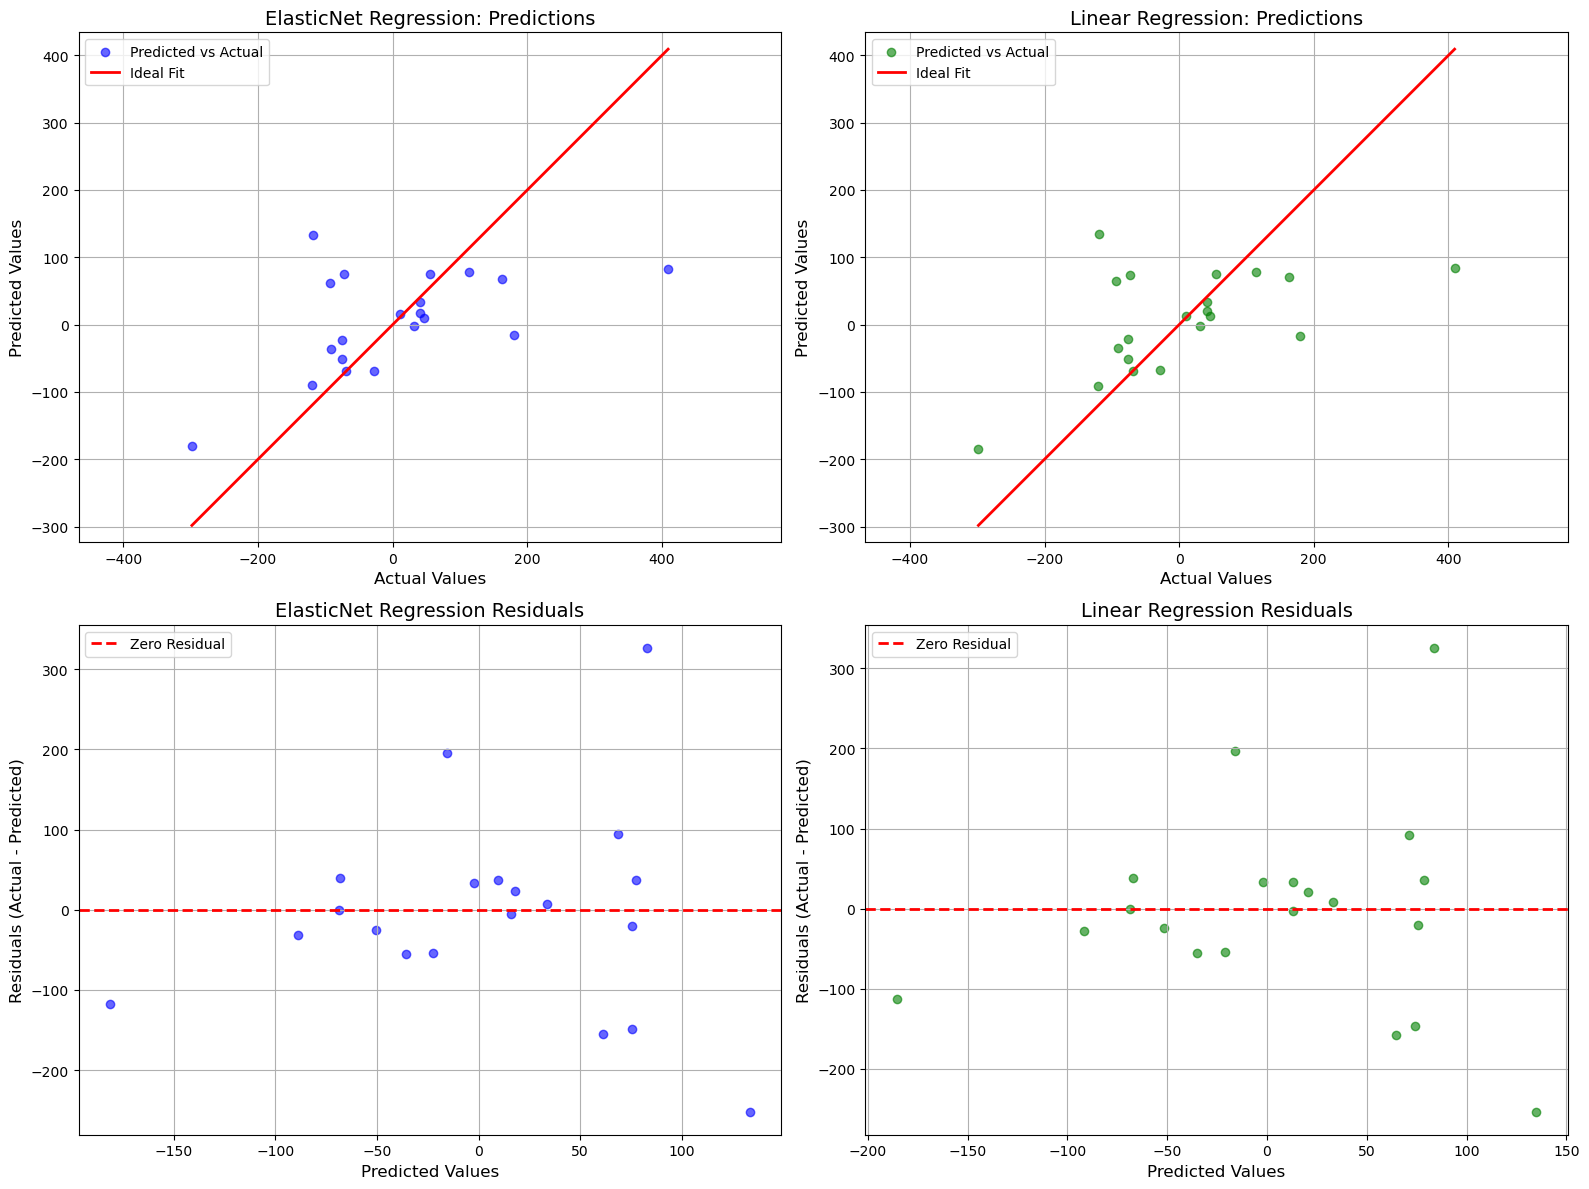

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# 生成模拟数据：具有多重共线性的特征
np.random.seed(42)  # 固定随机种子保证可重复性
n_samples, n_features = 100, 5  # 设定样本数和特征数
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=10, random_state=42)

# 人为引入多重共线性
X[:, 1] = X[:, 0] + np.random.randn(n_samples) * 0.01  # 第2列与第1列高度相关
X[:, 3] = X[:, 2] + np.random.randn(n_samples) * 0.01  # 第4列与第3列高度相关

# 将数据集划分为训练集和验证集，验证集占20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练ElasticNet回归模型（L1和L2正则化）
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=1.0)  # alpha控制正则化强度，l1_ratio控制L1与L2的比值
elasticnet_model.fit(X_train, y_train)  # 用训练数据训练模型

# 创建并训练普通线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # 用训练数据训练模型

# 用训练好的模型进行预测
y_pred_elasticnet = elasticnet_model.predict(X_test)  # ElasticNet的预测结果
y_pred_linear = linear_model.predict(X_test)  # 普通线性回归的预测结果

# 计算模型的性能指标
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))  # 均方根误差（RMSE）
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)  # 决定系数R²
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))  # 普通线性回归的RMSE
r2_linear = r2_score(y_test, y_pred_linear)  # 普通线性回归的R²

# 获取回归公式
def get_formula(model, model_name):
    """返回回归模型的公式"""
    coefficients = model.coef_  # 回归系数
    intercept = model.intercept_  # 截距
    formula = f"{model_name}: y = {intercept:.2f} + " + " + ".join(
        [f"{coefficients[i]:.2f}*X{i+1}" for i in range(len(coefficients))]
    )
    return formula

# 打印回归公式和模型评估结果
print("=== ElasticNet Regression ===")
print(get_formula(elasticnet_model, "ElasticNet"))
print(f"RMSE: {rmse_elasticnet:.2f}, R²: {r2_elasticnet:.2f}\n")

print("=== Linear Regression ===")
print(get_formula(linear_model, "Linear"))
print(f"RMSE: {rmse_linear:.2f}, R²: {r2_linear:.2f}\n")

# 计算残差（真实值 - 预测值）
residuals_elasticnet = y_test - y_pred_elasticnet  # ElasticNet的残差
residuals_linear = y_test - y_pred_linear  # 普通线性回归的残差

# 可视化：4个子图布局（2行2列）
plt.figure(figsize=(16, 12))  # 调整画布大小

# --- ElasticNet回归预测图 ---
plt.subplot(2, 2, 1)  # 设定位置为2行2列的第1个子图
plt.scatter(y_test, y_pred_elasticnet, alpha=0.6, color="blue", label="Predicted vs Actual")  # 绘制实际值与预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Ideal Fit")  # 绘制理想拟合线（红色）
plt.title("ElasticNet Regression: Predictions", fontsize=14)  # 标题
plt.xlabel("Actual Values", fontsize=12)  # x轴标签
plt.ylabel("Predicted Values", fontsize=12)  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.axis('equal')  # 坐标轴等比例

# --- 线性回归预测图 ---
plt.subplot(2, 2, 2)  # 设定位置为2行2列的第2个子图
plt.scatter(y_test, y_pred_linear, alpha=0.6, color="green", label="Predicted vs Actual")  # 绘制实际值与预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Ideal Fit")  # 绘制理想拟合线（红色）
plt.title("Linear Regression: Predictions", fontsize=14)  # 标题
plt.xlabel("Actual Values", fontsize=12)  # x轴标签
plt.ylabel("Predicted Values", fontsize=12)  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.axis('equal')  # 坐标轴等比例

# --- ElasticNet回归残差图 ---
plt.subplot(2, 2, 3)  # 设定位置为2行2列的第3个子图
plt.scatter(y_pred_elasticnet, residuals_elasticnet, alpha=0.6, color="blue")  # 绘制预测值与残差的散点图
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residual")  # 绘制残差为零的参考线（红色虚线）
plt.title("ElasticNet Regression Residuals", fontsize=14)  # 标题
plt.xlabel("Predicted Values", fontsize=12)  # x轴标签
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

# --- 线性回归残差图 ---
plt.subplot(2, 2, 4)  # 设定位置为2行2列的第4个子图
plt.scatter(y_pred_linear, residuals_linear, alpha=0.6, color="green")  # 绘制预测值与残差的散点图
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residual")  # 绘制残差为零的参考线（红色虚线）
plt.title("Linear Regression Residuals", fontsize=14)  # 标题
plt.xlabel("Predicted Values", fontsize=12)  # x轴标签
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

plt.tight_layout()  # 自动调整子图之间的间距
plt.show()  # 显示图形

## 结果分析

- **ElasticNet回归公式**
$$y = 17.49 + 57.26 * X1 + 0.00 * X2 + 26.35 * X3 + 22.80 * X4 + 42.73 * X5$$
    - RMSE (均方根误差): 120.60
    - R² (决定系数): 0.28  
- **线性回归公式**
$$y = 17.71 + 40.54 * X1 + 17.27 * X2 + -144.06 * X3 + 194.79 * X4 + 43.84 * X5$$
    - RMSE (均方根误差): 120.38
    - R² (决定系数): 0.29  

- **比较**
    - **系数的稳定性**
        - ElasticNet回归：
            - 回归公式中，X2 的系数被压缩为 0，表明 ElasticNet 通过 L1 正则化对不重要的特征进行了特征选择，这使得模型更为简洁且具有更好的解释性。
            - 其他特征的系数也表现出较好的平稳性，范围在 [22.80, 57.26] 之间，表明 ElasticNet 有效地缓解了多重共线性的问题，避免了系数的极端波动。例如，X1 和 X3 的系数分别为 57.26 和 26.35，尽管这两个特征可能存在某些相关性，但它们的系数分配较为合理，表明 ElasticNet 在特征之间分配权重时表现得更加平衡。
        - 线性回归：
            - 系数波动较大，尤其是 X3 和 X4 的系数，分别为 -144.06 和 194.79，表明在多重共线性作用下，线性回归模型的系数变得不稳定。
            - 特征间的共线性导致了模型对小的扰动敏感，影响了解释性和预测的稳健性。例如：X1 和 X2 都是相关特征，但系数并未表现出显著的平滑性（40.54 和 17.27，差距过大），说明多重共线性仍然存在。
    - **预测性能**
        - 均方根误差 (RMSE)：
            - ElasticNet回归(120.60) 和线性回归 (120.38) 的误差非常接近。
        - 决定系数 (R²)：
            - 两者的 ( R² ) 值几乎相同（ElasticNet回归为 0.28，线性回归为 0.29），但ElasticNet回归的系数更加稳健，更适合泛化到新数据。
    - **ElasticNet回归的优势**
        - 特征选择能力：
            - ElasticNet回归通过结合 L1 和 L2 正则化对不重要的特征（如 X2）进行了自动特征选择，将其系数压缩为零，从而简化了模型并提高了其解释性。
        - 系数平滑：
            - 对于多重共线性的特征（如 X1 和 X3），ElasticNet回归通过 L2 正则化提供了平滑的系数分配（分别为 57.26 和 26.35），使得这些相关特征的影响得到了有效控制。
        - 适合高相关特征：
            - 在多重共线性较为显著的情况下，ElasticNet回归能够通过结合 L1 和 L2 正则化，既进行特征选择，又平滑高相关特征的系数，提供了更稳健的模型。而线性回归未能有效抑制这些高相关特征，导致系数出现了极端值，影响了模型的稳定性。

# 线性回归、Lasso回归、岭回归、ElasticNet回归异同分析

## 相同点

- **线性关系假设**：四种回归方法都假设目标值和输入特征之间是线性关系
- **适用于连续型目标变量的回归问题**：都适用于连续型目标变量的回归问题
- **需要进行预处理**：都需要对输入数据进行预处理（如标准化或归一化），以避免特征尺度对模型的影响

## 不同点

- **正则化方式**：
    - 线性回归：无正则化
    - Lasso回归：L1正则化，通过绝对值压缩，部分系数可归零
    - 岭回归：L2正则化，通过平方值压缩，系数被平滑化
    - ElasticNet回归：L1+L2正则化
- **特征选择能力**：
    - 线性回归：没有特征选择能力，所有特征都会被纳入模型
    - Lasso回归：强特征选择能力：通过L1正则化，不重要的特征系数会被压缩为0忽略掉
    - 岭回归：无特征选择能力，L2正则化只会缩小所有系数的值，但不会使系数变为0，因此所有特征都会保留在模型中
    - ElasticNet回归：适度特征选择能力：结合了L1和L2正则化，既能实现部分特征的稀疏化（通过L1使部分系数为0），又能缓解多重共线性问题（通过L2平滑系数）
- **多重共线性处理**：
    - 线性回归：易受多重共线性影响，导致系数不稳定
    - Lasso回归：部分缓解多重共线性，通过L1正则化，Lasso可以将部分特征的系数压缩为0，从而选择性地剔除一些相关性高的特征
    - 岭回归：借助于L2正则化，通过平滑化减小系数的剧烈波动，有效缓解共线性
    - ElasticNet回归：有效处理多重共线性，结合L1和L2正则化，ElasticNet既能对相关特征进行稀疏化（剔除部分冗余特征），又能平滑保留特征的系数
- **结果解释性**：
    - 线性回归：正常情况下因为没有正则化项，所以系数直接反映每个特征对目标变量的影响，解释性强。但是多重共线性时由于系数波动剧烈所以解释性大幅下降
    - Lasso回归：系数稀疏化，易于解释模型结果
    - 岭回归：系数较平滑，但可能保留较弱相关特征，解释性略逊
    - ElasticNet回归：结合L1和L2正则化，既能稀疏化模型（剔除不重要特征），又能平滑相关特征的系数，解释性较高
- **适用场景**：
    - 线性回归：适用于特征间独立、无共线性、数据噪声较低的场景
    - Lasso回归：适用于特征数量较多、有冗余特征或噪声的场景
    - 岭回归：适用于存在多重共线性或特征间相关性高的场景
    - ElasticNet回归：适用于高维数据中既存在多重共线性又需要特征选择的场景，是处理复杂特征关系时最具解释性的方法。

| 特征             | 线性回归                                                                 | Lasso回归                                                                 | 岭回归                                                                 | ElasticNet回归                                                                 |
|:-----------------|:-------------------------------------------------------------------------|:---------------------------------------------------------------------------|:-----------------------------------------------------------------------|:-------------------------------------------------------------------------------|
| **正则化方式**   | 无正则化                                                                 | L1正则化（通过绝对值压缩，部分系数可归零）                                 | L2正则化（通过平方值压缩，系数平滑化）                                 | L1 + L2正则化（结合L1和L2正则化）                                               |
| **特征选择能力** | 无特征选择能力（所有特征均纳入模型）                                     | 强特征选择能力（通过L1正则化，部分系数归零）                                 | 无特征选择能力（L2正则化缩小系数，但不使其为0）                           | 适度特征选择能力（结合L1和L2，部分系数归零，缓解多重共线性）                     |
| **多重共线性处理** | 易受多重共线性影响，导致系数不稳定                                       | 部分缓解多重共线性（通过L1正则化剔除相关性高的特征）                         | 有效缓解多重共线性（L2正则化平滑化系数）                                 | 有效处理多重共线性（L1用于稀疏化，L2用于平滑系数）                               |
| **结果解释性**   | 强（没有正则化项，系数反映每个特征的影响，但多重共线性时下降）             | 强（系数稀疏化，便于解释）                                                 | 较弱（系数平滑，可能保留弱相关特征）                                     | 较强（既能稀疏化不重要特征，又能平滑相关特征的系数）                             |
| **适用场景**     | 特征独立、无共线性、数据噪声较低的场景                                   | 特征数量多、存在冗余特征或噪声的场景                                       | 存在多重共线性或特征相关性高的场景                                       | 高维数据中有多重共线性且需要特征选择的场景，适合复杂特征关系                     |